In [1]:
import numpy as np
import  matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
import sklearn.metrics
import seaborn as sb
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import r2_score, balanced_accuracy_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv('./ph-data.csv')

In [3]:
df.head()

,blue,green,red,label
0,36,27,231,0
1,36,84,250,1
2,37,164,255,2
3,22,205,255,3
4,38,223,221,4


In [4]:
colors = np.array([df.red, df.green, df.blue]).T

In [5]:
df.head()

,blue,green,red,label
0,36,27,231,0
1,36,84,250,1
2,37,164,255,2
3,22,205,255,3
4,38,223,221,4


In [8]:
'''Let's recognize pH value based on image color. 
First of all I visualized each point depending on its RBG color, 
then compared this visualization with the color of the universal indicator 
in the same pH values of corresponding points.'''

In [5]:
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


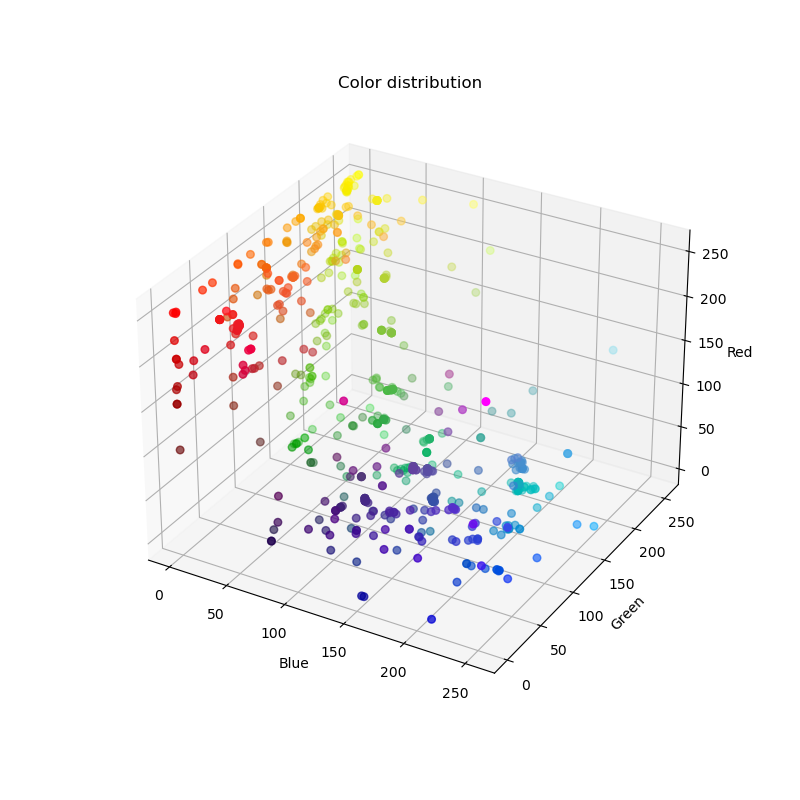

In [6]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
x = df.blue
y = df.green
z = df.red
ax.scatter(x, y, z, c=colors/255.0, s=30)
ax.set_title("Color distribution")
ax.set_xlabel("Blue")
ax.set_ylabel("Green")
ax.set_zlabel("Red")
plt.show()

<IPython.core.display.Javascript object>


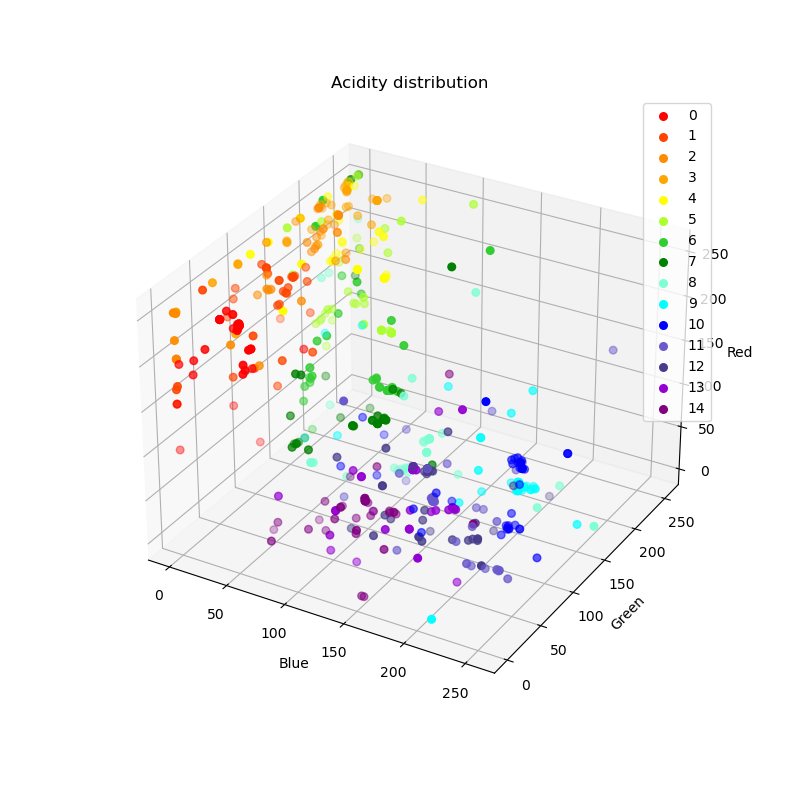

In [7]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
labels = range(0, 15)
ph_colors = ['red','orangered', 'darkorange', 'orange', 'yellow', 'greenyellow', 'limegreen', 'green', 'aquamarine', 'aqua', 'blue', 'slateblue', 'darkslateblue', 'darkviolet', 'purple']
for l in labels:
    x = df[df['label'] == l].blue
    y = df[df['label'] == l].green
    z = df[df['label'] == l].red
    ax.scatter(x, y, z, label=l, c=ph_colors[l], s=30)
ax.set_title("Acidity distribution")
ax.set_xlabel("Blue")
ax.set_ylabel("Green")
ax.set_zlabel("Red")
ax.legend(loc='best')
plt.show()

In [ ]:
'''Visualizations of color distribution and pH distribution are almost 
the same, which indicates a possible correlation between these values. 
But it is often necessary in practice to find out not the specific pH value,
but the acidity. For this purpose, two more classifications have been made.'''

<IPython.core.display.Javascript object>


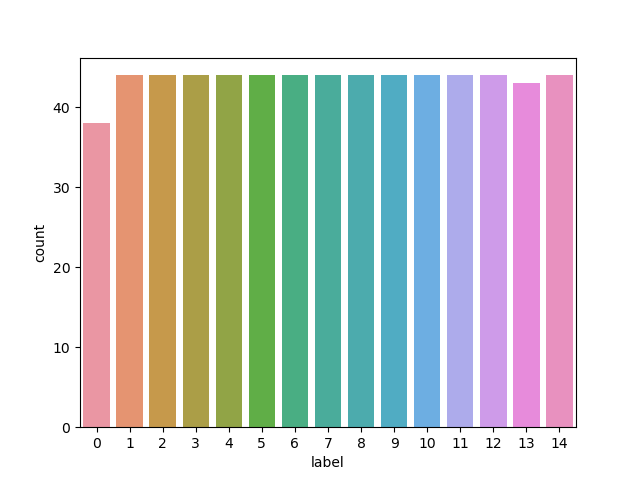

<AxesSubplot:xlabel='label', ylabel='count'>

In [9]:
sb.countplot(x='label', data=df)

In [10]:
df.isnull().sum()

blue     0
green    0
red      0
label    0
dtype: int64

In [11]:
df.shape

(653, 4)

In [12]:
def determine_acidity_3_group(df):
    if df['label'] == 7:
        val = 'neutral'
    elif df['label'] > 7:
        val = 'alkali'
    elif df['label'] < 7:
        val = 'acid'
    return val


def determine_acidity_5_group(df):
    if df['label'] == 7:
        val = 'neutral'
    elif df['label'] > 11:
        val = 'strong_alkali'
    elif df['label'] < 3:
        val = 'strong_acid'
    elif 11 >= df['label'] > 7:
        val = 'alkali'
    elif 3 <= df['label'] < 7:
        val = 'acid'    
    return val

In [13]:
df['acidity_3_group'] = df.apply(determine_acidity_3_group, axis=1)
df['acidity_5_group'] = df.apply(determine_acidity_5_group, axis=1)

In [14]:
df.head()

,blue,green,red,label,acidity_3_group,acidity_5_group
0,36,27,231,0,acid,strong_acid
1,36,84,250,1,acid,strong_acid
2,37,164,255,2,acid,strong_acid
3,22,205,255,3,acid,acid
4,38,223,221,4,acid,acid


<IPython.core.display.Javascript object>


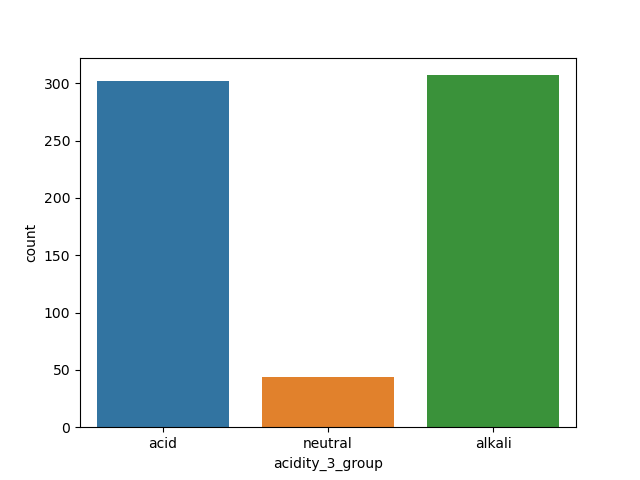

<AxesSubplot:xlabel='acidity_3_group', ylabel='count'>

In [15]:
sb.countplot(x='acidity_3_group', data=df)

<IPython.core.display.Javascript object>


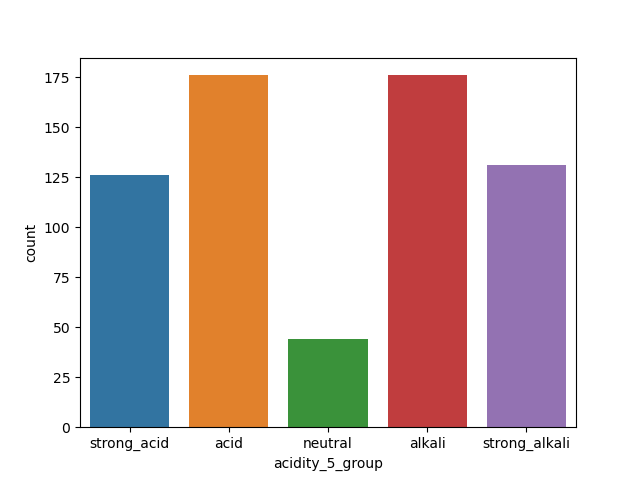

<AxesSubplot:xlabel='acidity_5_group', ylabel='count'>

In [16]:
sb.countplot(x='acidity_5_group', data=df)

In [ ]:
'''The distribution of points in the new classifications corresponds to the original data.
Few number of groups can help make classification more accurate.'''

<IPython.core.display.Javascript object>


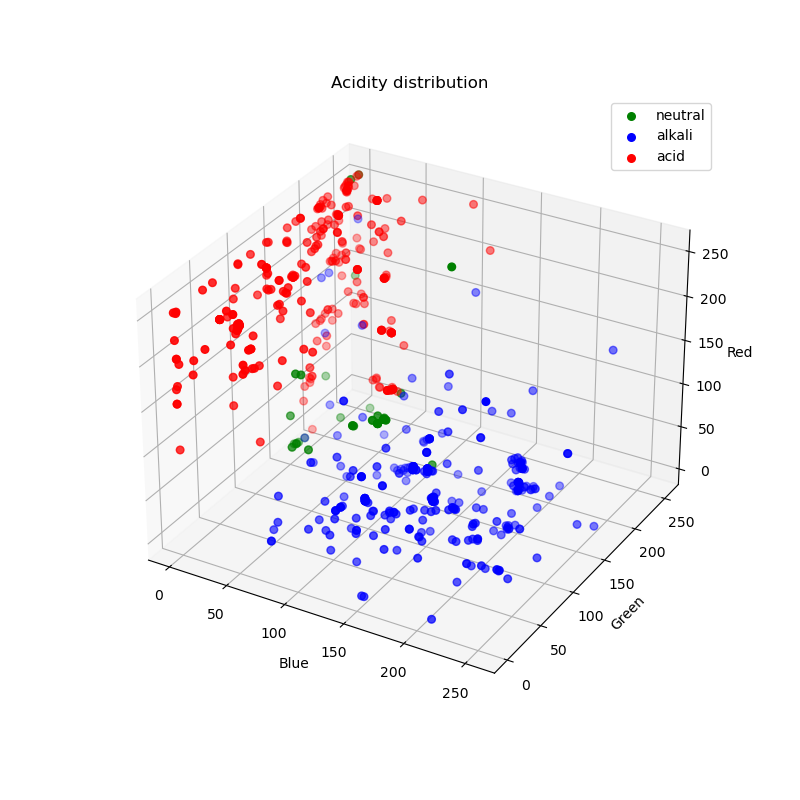

In [17]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
labels = ['neutral', 'alkali', 'acid']
ph_colors = ['green','blue', 'red']
for l in range(0, 3):
    x = df[df['acidity_3_group'] == labels[l]].blue
    y = df[df['acidity_3_group'] == labels[l]].green
    z = df[df['acidity_3_group'] == labels[l]].red
    ax.scatter(x, y, z, label=labels[l], c=ph_colors[l], s=30)
ax.set_title("Acidity distribution")
ax.set_xlabel("Blue")
ax.set_ylabel("Green")
ax.set_zlabel("Red")
ax.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


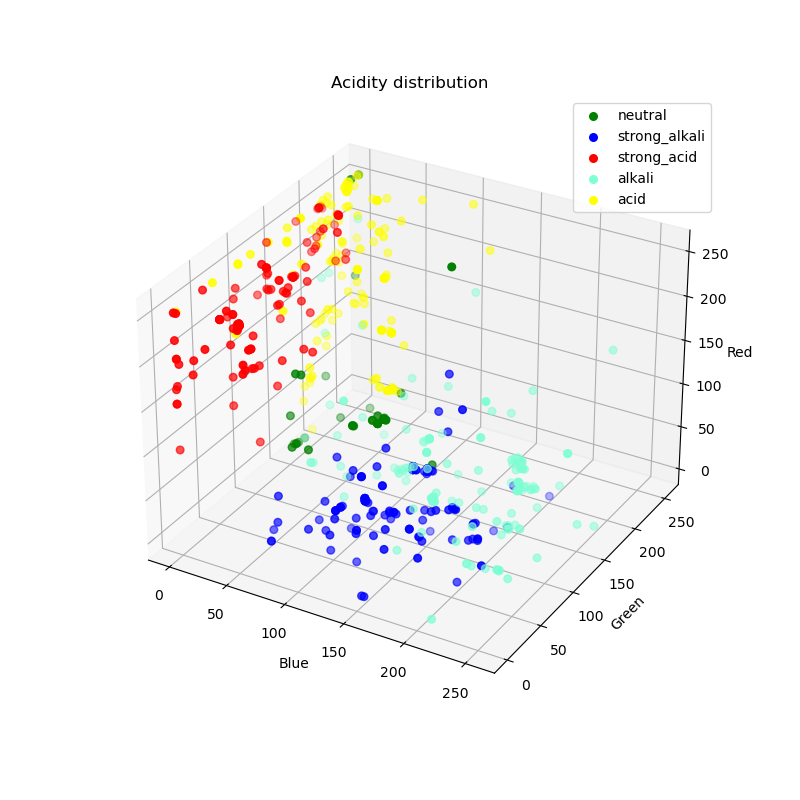

In [18]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
labels = ['neutral', 'strong_alkali', 'strong_acid', 'alkali', 'acid']
ph_colors = ['green','blue', 'red', 'aquamarine', 'yellow']
for l in range(0, 5):
    x = df[df['acidity_5_group'] == labels[l]].blue
    y = df[df['acidity_5_group'] == labels[l]].green
    z = df[df['acidity_5_group'] == labels[l]].red
    ax.scatter(x, y, z, label=labels[l], c=ph_colors[l], s=30)
ax.set_title("Acidity distribution")
ax.set_xlabel("Blue")
ax.set_ylabel("Green")
ax.set_zlabel("Red")
ax.legend(loc='best')
plt.show()

In [ ]:
'''Divide the data into test and training samples. Here and below the end:

'_1' - corresponds with label with 14 pH-values
'_2' - corresponds with 3 group of acidicy: 'neutral', 'alkali', 'acid'
'_3' - corresponds with 5 group of acidicy: 'neutral', 'strong_alkali', 'strong_acid', 'alkali', 'acid''''

In [19]:
df_result_1 = df['label']
df_result_2 = df['acidity_3_group']
df_result_3 = df['acidity_5_group']
df_inputs = df.drop(['label', 'acidity_3_group', 'acidity_5_group'], axis=1)

In [20]:
X_train, X_test, y_train_1, y_test_1 = train_test_split(df_inputs, df_result_1, test_size=0.25, random_state=1)

In [21]:
y_train_2 = df['acidity_3_group'].iloc[y_train_1.index]
y_train_3 = df['acidity_5_group'].iloc[y_train_1.index]
y_test_2 = df['acidity_3_group'].iloc[y_test_1.index]
y_test_3 = df['acidity_5_group'].iloc[y_test_1.index]

In [22]:
'''Because small amount of data are presented in dataset, 
many variants of hyperparameters can be iterated. 
Determination of hyperparameters for four most suitable model 
(LogisticRegression, KNeighborsClassifier, RandomForestClassifier, 
GradientBoostingClassifier) was done with 'balanced_accuracy' as scoring, 
because of data in group №2 and №3 not equal.'''

"Because small amount of data are presented in dataset, \nmany variants of hyperparameters can be iterated. \nDetermination of hyperparameters for four most suitable model \n(LogisticRegression, KNeighborsClassifier, RandomForestClassifier, \nGradientBoostingClassifier) was done with 'balanced_accuracy' as scoring, \nbecause of data in group №2 and №3 not equal."

In [23]:
import random
random.seed(0)

In [24]:
def best_model(X_train, y_train):
    
    param_distribution_log_reg = {'penalty':['l2', 'none'], 'fit_intercept':[True,False], 'solver':['newton-cg', 'lbfgs', 'sag', 'saga']}
    param_distribution_KNN = {'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
    param_distribution_rand_forests = {'n_estimators': range(5, 20),  'max_depth': range(3, 30)}
    param_distribution_grad_boosting = {'n_estimators': range(5, 20),  'max_depth': range(3, 30)}
        
    if y_train.dtypes == 'int64':
        
        model_log_regression = GridSearchCV(LogisticRegression(), param_distribution_log_reg, scoring='balanced_accuracy', n_jobs=-1)
        model_KNN = GridSearchCV(KNeighborsClassifier(), param_distribution_KNN, scoring='balanced_accuracy', n_jobs=-1)
        model_rand_forests = RandomizedSearchCV(RandomForestClassifier(), param_distribution_rand_forests, n_iter=60, scoring='balanced_accuracy', n_jobs=-1, random_state=1)
        model_grad_boosting = RandomizedSearchCV(GradientBoostingClassifier(), param_distribution_grad_boosting, n_iter=60, scoring='balanced_accuracy', n_jobs=-1, random_state=1)
        
        model_log_regression.fit(X_train, y_train)
        model_KNN.fit(X_train, y_train)
        model_rand_forests.fit(X_train, y_train)
        model_grad_boosting.fit(X_train, y_train)
        
        result = pd.DataFrame({'Score': [model_log_regression.best_score_, model_KNN.best_score_, model_rand_forests.best_score_, model_grad_boosting.best_score_],
                               'Parameters': [model_log_regression.best_params_, model_KNN.best_params_, model_rand_forests.best_params_, model_grad_boosting.best_params_]}, 
                              index=['LogisticRegression', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier'])
        
    elif y_train.dtypes == 'object':
        
        model_log_regression = GridSearchCV(LogisticRegression(), param_distribution_log_reg, scoring='balanced_accuracy', n_jobs=-1)
        model_KNN = GridSearchCV(KNeighborsClassifier(), param_distribution_KNN, scoring='balanced_accuracy', n_jobs=-1)
        model_rand_forests = GridSearchCV(RandomForestClassifier(), param_distribution_rand_forests, scoring='balanced_accuracy', n_jobs=-1)
        model_grad_boosting = GridSearchCV(GradientBoostingClassifier(), param_distribution_grad_boosting, scoring='balanced_accuracy', n_jobs=-1)
        
        model_log_regression.fit(X_train, y_train)
        model_KNN.fit(X_train, y_train)
        model_rand_forests.fit(X_train, y_train)
        model_grad_boosting.fit(X_train, y_train)
        
        result = pd.DataFrame({'Score': [model_log_regression.best_score_, model_KNN.best_score_, model_rand_forests.best_score_, model_grad_boosting.best_score_],
                               'Parameters': [model_log_regression.best_params_, model_KNN.best_params_, model_rand_forests.best_params_, model_grad_boosting.best_params_]}, 
                              index=['LogisticRegression', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier'])
    
    return result

In [25]:
best_model(X_train, y_train_1)

,Score,Parameters
LogisticRegression,0.544968,"{'fit_intercept': True, 'penalty': 'l2', 'solv..."
KNeighborsClassifier,0.703841,{'algorithm': 'auto'}
RandomForestClassifier,0.747365,"{'n_estimators': 19, 'max_depth': 10}"
GradientBoostingClassifier,0.728857,"{'n_estimators': 19, 'max_depth': 4}"


In [26]:
best_model(X_train, y_train_2)

,Score,Parameters
LogisticRegression,0.807603,"{'fit_intercept': True, 'penalty': 'l2', 'solv..."
KNeighborsClassifier,0.909655,{'algorithm': 'auto'}
RandomForestClassifier,0.937865,"{'max_depth': 21, 'n_estimators': 10}"
GradientBoostingClassifier,0.910748,"{'max_depth': 3, 'n_estimators': 6}"


In [27]:
best_model(X_train, y_train_3)

,Score,Parameters
LogisticRegression,0.798254,"{'fit_intercept': True, 'penalty': 'l2', 'solv..."
KNeighborsClassifier,0.878212,{'algorithm': 'auto'}
RandomForestClassifier,0.920196,"{'max_depth': 25, 'n_estimators': 11}"
GradientBoostingClassifier,0.870517,"{'max_depth': 4, 'n_estimators': 10}"


In [ ]:
'''Priority model - RandomForestClassifier.'''

In [28]:
best_model1 = RandomForestClassifier(n_estimators=19, max_depth=10)
best_model2 = RandomForestClassifier(n_estimators=10, max_depth=21)
best_model3 = RandomForestClassifier(n_estimators=11, max_depth=25)

In [29]:
best_model1.fit(X_train, y_train_1)

RandomForestClassifier(max_depth=10, n_estimators=19)

In [30]:
best_model2.fit(X_train, y_train_2)

RandomForestClassifier(max_depth=21, n_estimators=10)

In [31]:
best_model3.fit(X_train, y_train_3)

RandomForestClassifier(max_depth=25, n_estimators=11)

In [32]:
y_pred_1 = best_model1.predict(X_test)

In [33]:
y_pred_2 = best_model2.predict(X_test)

In [34]:
y_pred_3 = best_model3.predict(X_test)

<IPython.core.display.Javascript object>


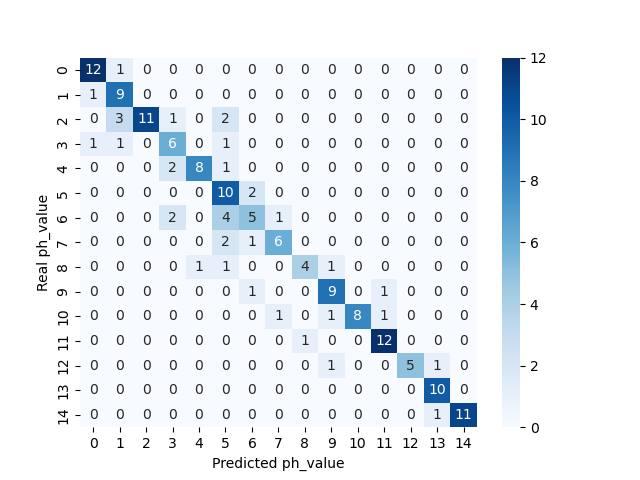

In [35]:
cnf_matrix1 = confusion_matrix(y_test_1, y_pred_1)
sb.heatmap(cnf_matrix1, annot=True, cmap='Blues', fmt='g')
plt.ylabel('Real ph_value')
plt.xlabel('Predicted ph_value')
plt.show()

<IPython.core.display.Javascript object>


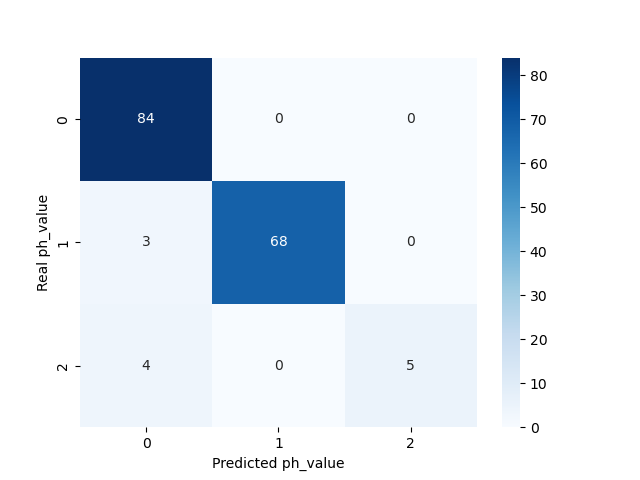

In [36]:
cnf_matrix2 = confusion_matrix(y_test_2, y_pred_2)
sb.heatmap(cnf_matrix2, annot=True, cmap='Blues', fmt='g')
plt.ylabel('Real ph_value')
plt.xlabel('Predicted ph_value')
plt.show()

<IPython.core.display.Javascript object>


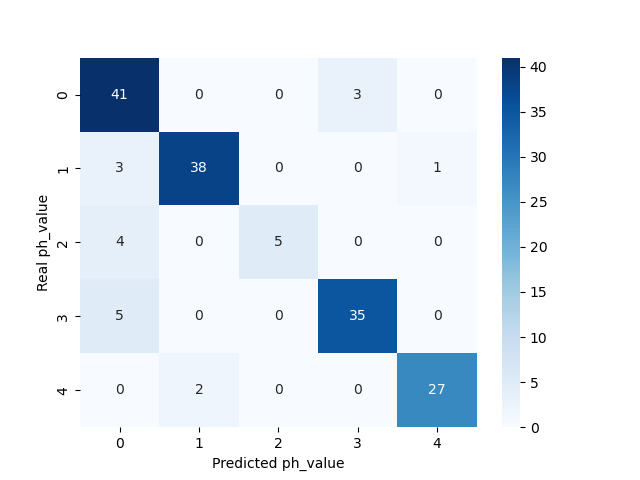

In [37]:
cnf_matrix3 = confusion_matrix(y_test_3, y_pred_3)
sb.heatmap(cnf_matrix3, annot=True, cmap='Blues', fmt='g')
plt.ylabel('Real ph_value')
plt.xlabel('Predicted ph_value')
plt.show()

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test_3, y_pred_3, target_names=df.acidity_5_group.unique()))

               precision    recall  f1-score   support

  strong_acid       0.77      0.93      0.85        44
         acid       0.95      0.90      0.93        42
      neutral       1.00      0.56      0.71         9
       alkali       0.92      0.88      0.90        40
strong_alkali       0.96      0.93      0.95        29

     accuracy                           0.89       164
    macro avg       0.92      0.84      0.87       164
 weighted avg       0.90      0.89      0.89       164



In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test_2, y_pred_2, target_names=df.acidity_3_group.unique()))

              precision    recall  f1-score   support

        acid       0.92      1.00      0.96        84
     neutral       1.00      0.96      0.98        71
      alkali       1.00      0.56      0.71         9

    accuracy                           0.96       164
   macro avg       0.97      0.84      0.88       164
weighted avg       0.96      0.96      0.95       164



In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test_1, y_pred_1))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.64      0.90      0.75        10
           2       1.00      0.65      0.79        17
           3       0.55      0.67      0.60         9
           4       0.89      0.73      0.80        11
           5       0.48      0.83      0.61        12
           6       0.56      0.42      0.48        12
           7       0.75      0.67      0.71         9
           8       0.80      0.57      0.67         7
           9       0.75      0.82      0.78        11
          10       1.00      0.73      0.84        11
          11       0.86      0.92      0.89        13
          12       1.00      0.71      0.83         7
          13       0.83      1.00      0.91        10
          14       1.00      0.92      0.96        12

    accuracy                           0.77       164
   macro avg       0.80      0.76      0.77       164
weighted avg       0.80   

In [41]:
def roc_auc_score_summary(model, X_test, y_test):
    y_preb_probs = model.predict_proba(X_test)
    roc_auc_score_for_model = round(roc_auc_score(y_test, y_preb_probs, average="weighted", multi_class="ovr"), 3)
    count_of_classes = len(y_test.unique())
    print('ROC_AUC_score of model with', count_of_classes, 'classes =', roc_auc_score_for_model)
    return 

In [42]:
roc_auc_score_summary(best_model1, X_test, y_test_1)

ROC_AUC_score of model with 15 classes = 0.948


In [43]:
roc_auc_score_summary(best_model3, X_test, y_test_3)

ROC_AUC_score of model with 5 classes = 0.964


In [44]:
roc_auc_score_summary(best_model2, X_test, y_test_2)

ROC_AUC_score of model with 3 classes = 0.98
